# Telecom User

<h2 align = 'left',style="color:red"> Work Description</h2> 

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the `churn`, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

1) Description of the data (with the calculation of basic statistics);

2) Research of dependencies and formulation of hypotheses;

3) Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;

4) Comparison of the quality of the obtained models.
</p>


<h5 style= "color:brown">By the above description we finalized that Churn is or target variable</h5>


### `#Codebook`
>`telecom_users.csv` contains the following values:

>`customerID` - customer id 

>`gender` - client gender (male / female)

>`SeniorCitizen` - whether the client is a pensioner (1, 0)

>`Partner` - whether the client is married (Yes, No)

>`Dependents` - does the client have dependents (Yes, No)

>`tenure` - how many months a person has been a client of the company

>`PhoneService` - is the telephone service activated (Yes, No)

>`MultipleLines` - whether multiple telephone lines are connected (Yes, No, No phone service)

>`InternetService` - client's Internet provider (DSL, Fiber optic, No)

>`OnlineSecurity` - is the online security service enabled (Yes, No, No internet service)

>`OnlineBackup` - is the online backup service activated (Yes, No, No internet service)

>`DeviceProtection` - does the client have equipment insurance (Yes, No, No internet service)

>`TechSupport` - is the technical support service activated (Yes, No, No internet service)

>`StreamingTV` - is the streaming TV service activated (Yes, No, No internet service)

>`StreamingMovies` - is the streaming cinema service activated (Yes, No, No internet service)

>`Contract` - type of customer contract (Month-to-month, One year, Two year)

>`PaperlessBilling` - whether the client uses paperless billing (Yes, No)

>`PaymentMethod` - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

>`MonthlyCharges` - current monthly payment

>`TotalCharge` - the total amount that the client has paid for the services for the entire time

>`Churn` - whether there was a churn (Yes or No)

## Importing library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Reading 

In [5]:
df = pd.read_csv('telecom_users.csv')
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


## Null value treatment

In [6]:
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### We find zero null values in our data. So doesn't required any treatment

##  Check for Duplicated rows

In [7]:
df.duplicated().sum()

0

###### Found no duplicates rows 

In [8]:
df.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

## EDA (Exploratory data analysis)

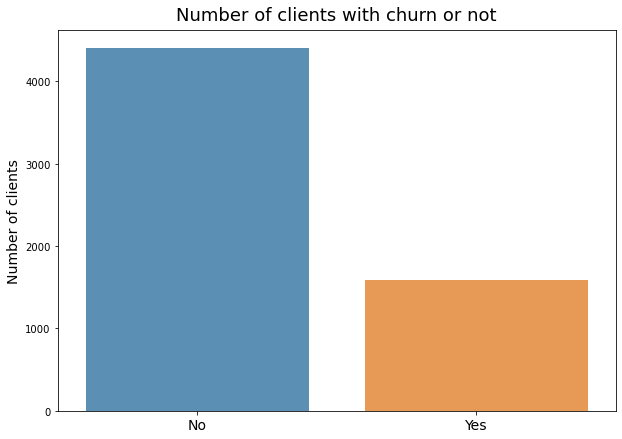

In [9]:
churn = df.Churn.value_counts()
plt.figure(figsize=(10, 7))

sns.barplot(x=churn.index, y=churn.values, alpha=0.8)
plt.title('Number of clients with churn or not', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

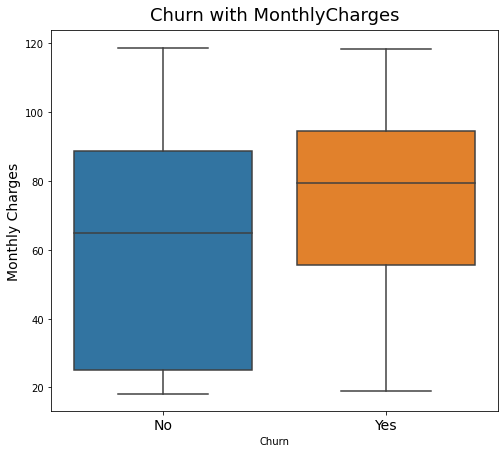

In [10]:
plt.figure(figsize=(8,7))
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)
plt.title('Churn with MonthlyCharges', fontsize=18, pad=10)
plt.ylabel('Monthly Charges', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

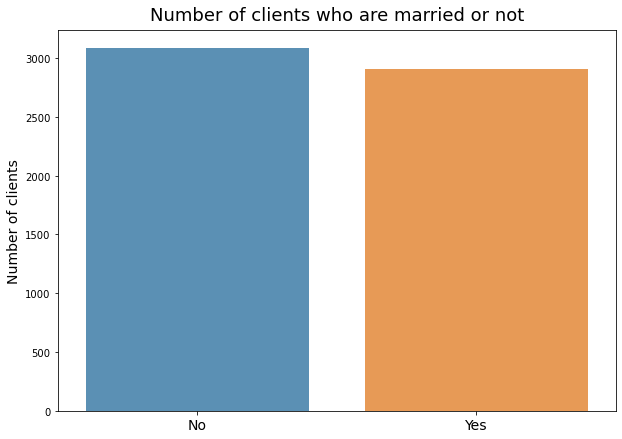

In [11]:
ismaried = df['Partner'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=ismaried.index, y=ismaried.values, alpha=0.8)
plt.title('Number of clients who are married or not', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

 ` Here we obsorve that unmarried clients a little more than married or married clients.`

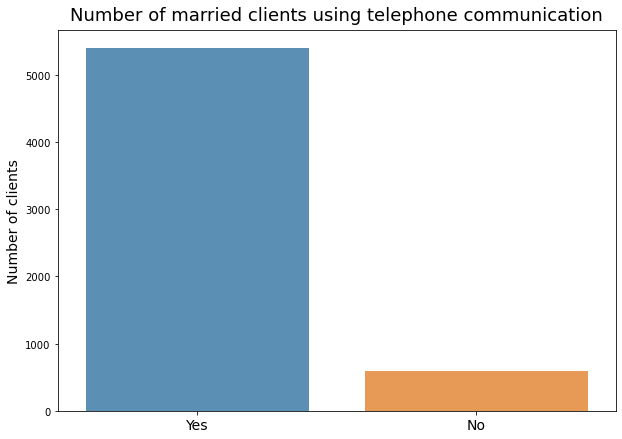

In [12]:
phone_servise = df['PhoneService'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=phone_servise.index, y=phone_servise.values, alpha=0.8)
plt.title('Number of married clients using telephone communication', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

`Finaly we conclude that almost all clients use a Telephone connection was confirmed`

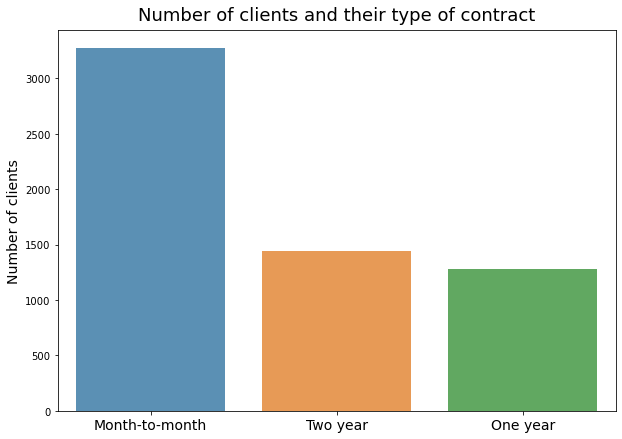

In [13]:
contract = df['Contract'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=contract.index, y=contract.values, alpha=0.8)
plt.title('Number of clients and their type of contract', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

`As we observed that, about half of the clients have a "From month to month" contract type, and about 1/4 each have "Two years" and "One year" contract types`

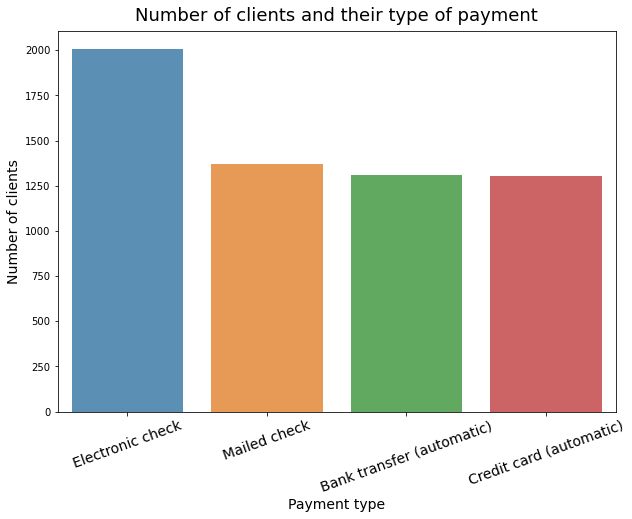

In [14]:
PaymentMethod = df['PaymentMethod'].value_counts()

plt.figure(figsize=(10, 7))

sns.barplot(x=PaymentMethod.index, y=PaymentMethod.values, alpha=0.8)
plt.title('Number of clients and their type of payment', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xlabel('Payment type', fontsize=14)
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=10)
plt.show()

`Most of the clients pay for services by electronic check on comparing to others`

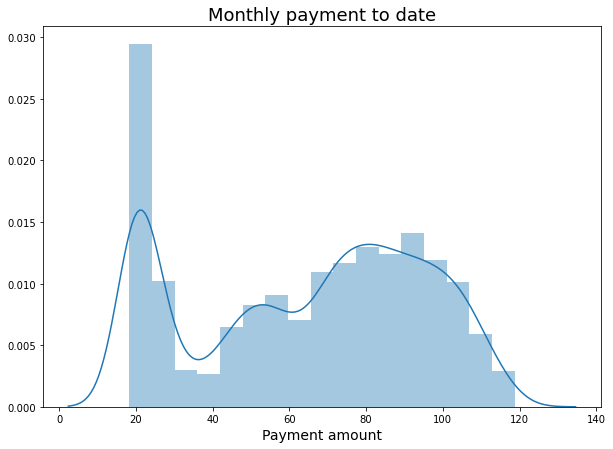

In [15]:
montly_charges = df['MonthlyCharges']

plt.figure(figsize=(10, 7))

sns.distplot(montly_charges).set(ylabel=None, xlabel=None)
plt.title('Monthly payment to date', fontsize=18)
plt.xlabel('Payment amount', fontsize=14)
plt.show()

In [16]:
df.sample(8)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5130,4613,6987-XQSJT,Female,1,No,No,54,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.50,4370.25,Yes
2580,3686,5899-MQZZL,Female,0,No,No,13,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5876,379,5686-CMAWK,Male,0,No,No,17,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,One year,No,Electronic check,86.75,1410.25,No
3939,2040,7398-HPYZQ,Male,0,Yes,No,71,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),90.55,6404,No
3465,4327,0958-YHXGP,Female,0,No,No,7,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,69.90,497.3,No
3605,5513,0248-PGHBZ,Female,1,No,No,67,Yes,No,Fiber optic,...,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),92.45,6140.85,No
3069,6798,7562-UXTPG,Female,0,No,No,13,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,886.7,No
1404,5940,9711-FJTBX,Male,0,Yes,Yes,56,Yes,No,Fiber optic,...,Yes,Yes,No,No,One year,Yes,Mailed check,85.85,4793.8,No


In [17]:
df = df.replace('Yes',1)
df = df.replace('No',0)
df = df.replace('No internet service',2)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service',2)

In [18]:
df.sample(8)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4528,5968,9033-EOXWV,Female,0,0,0,12,1,1,DSL,...,0,1,1,1,One year,0,Mailed check,74.05,872.65,1
4860,3677,6656-JWRQX,Female,0,0,0,1,0,2,DSL,...,0,1,0,0,Month-to-month,0,Mailed check,30.55,30.55,0
3033,5695,1813-JYWTO,Female,0,1,0,72,1,1,Fiber optic,...,0,0,0,0,Two year,0,Bank transfer (automatic),80.45,5737.6,0
3065,5604,9432-VOFYX,Male,0,0,0,17,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,70.80,1207,0
281,2317,6770-UAYGJ,Female,0,1,1,49,1,1,0,...,2,2,2,2,Two year,0,Mailed check,25.25,1211.65,0
1055,6705,3733-ZEECP,Male,0,1,1,22,1,0,DSL,...,0,1,0,0,Month-to-month,1,Electronic check,51.10,1232.9,0
3751,1286,8985-OOPOS,Female,0,0,0,1,1,0,DSL,...,1,1,1,1,One year,0,Credit card (automatic),74.10,74.1,0
913,1170,9127-FHJBZ,Male,0,1,1,72,1,1,Fiber optic,...,1,1,1,1,Two year,1,Electronic check,114.00,8093.15,0


In [19]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

In [20]:
df.InternetService.value_counts()

Fiber optic    2627
DSL            2068
0              1291
Name: InternetService, dtype: int64

In [21]:
df['InternetService'] = df['InternetService'].replace('Fiber optic',2)
df['InternetService'] = df['InternetService'].replace('DSL',1)
df['InternetService'] = df['InternetService'].replace('No',0)

In [22]:
df.Contract.value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [23]:
df['Contract'] = df['Contract'].replace('Month-to-month',1)
df['Contract'] = df['Contract'].replace('One year',12)
df['Contract'] = df['Contract'].replace('Two year',24)

In [24]:
df.PaymentMethod.value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [25]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check',3)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check',2)
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)',1)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)',0)

In [26]:
df['gender'].value_counts()

1    3050
0    2936
Name: gender, dtype: int64

In [27]:
df.sample(8)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3160,1011,6614-YOLAC,0,0,1,1,71,0,2,1,...,0,1,1,1,24,0,2,58.65,4145.25,0
3974,4281,8582-KRHPJ,1,0,0,0,50,0,2,1,...,0,0,0,0,1,1,2,35.00,1782.4,0
4161,1098,9742-XOKTS,1,0,1,1,67,1,1,2,...,0,1,0,0,12,0,3,89.55,6038.55,0
956,6142,3982-XWFZQ,0,0,1,0,42,1,1,1,...,0,0,0,0,1,1,3,50.25,2203.65,1
1896,2236,3420-ZDBMA,1,1,0,0,5,1,0,2,...,0,0,0,0,1,1,2,71.45,371.6,0
4575,1279,3452-FLHYD,1,0,1,0,25,1,0,0,...,2,2,2,2,12,1,1,20.95,495.15,0
2707,1053,5669-SRAIP,0,0,0,0,5,0,2,1,...,1,0,0,1,1,0,3,39.50,210.75,1
2409,6066,5349-IECLD,1,0,0,0,2,1,0,2,...,1,0,1,1,1,0,3,94.95,178.1,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   int64  
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   int64  
 5   Dependents        5986 non-null   int64  
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   int64  
 8   MultipleLines     5986 non-null   int64  
 9   InternetService   5986 non-null   int64  
 10  OnlineSecurity    5986 non-null   int64  
 11  OnlineBackup      5986 non-null   int64  
 12  DeviceProtection  5986 non-null   int64  
 13  TechSupport       5986 non-null   int64  
 14  StreamingTV       5986 non-null   int64  
 15  StreamingMovies   5986 non-null   int64  
 16  Contract          5986 non-null   int64  


In [29]:
df.TotalCharges.value_counts()

           10
20.2       10
19.75       8
19.55       7
20.05       6
           ..
7283.25     1
250.8       1
6903.1      1
1253.5      1
1777.6      1
Name: TotalCharges, Length: 5611, dtype: int64

`As it's showing TotalCharges dtype as "Object" in info but "int64" in value_counts, So we convert those object type in int64`

In [30]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # has some string values, force them to NaN

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   int64  
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   int64  
 5   Dependents        5986 non-null   int64  
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   int64  
 8   MultipleLines     5986 non-null   int64  
 9   InternetService   5986 non-null   int64  
 10  OnlineSecurity    5986 non-null   int64  
 11  OnlineBackup      5986 non-null   int64  
 12  DeviceProtection  5986 non-null   int64  
 13  TechSupport       5986 non-null   int64  
 14  StreamingTV       5986 non-null   int64  
 15  StreamingMovies   5986 non-null   int64  
 16  Contract          5986 non-null   int64  


In [32]:
df[df['TotalCharges'].isna()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,1,0,0,1,0,1,1,1,...,0,1,0,0,24,1,1,61.90,NaN,0
634,1340,1371-DWPAZ,0,0,1,1,0,0,2,1,...,1,1,1,0,24,0,0,56.05,NaN,0
2771,3826,3213-VVOLG,1,0,1,1,0,1,1,0,...,2,2,2,2,24,0,2,25.35,NaN,0
3086,5218,2923-ARZLG,1,0,1,1,0,1,0,0,...,2,2,2,2,12,1,2,19.70,NaN,0
3255,3331,7644-OMVMY,1,0,1,1,0,1,0,0,...,2,2,2,2,24,0,2,19.85,NaN,0
4326,936,5709-LVOEQ,0,0,1,1,0,1,0,1,...,1,0,1,1,24,0,2,80.85,NaN,0
5375,753,3115-CZMZD,1,0,0,1,0,1,0,0,...,2,2,2,2,24,0,2,20.25,NaN,0
5382,4380,2520-SGTTA,0,0,1,1,0,1,0,0,...,2,2,2,2,24,0,2,20.00,NaN,0
5695,488,4472-LVYGI,0,0,1,1,0,0,2,1,...,1,1,1,0,24,1,1,52.55,NaN,0
5951,1082,4367-NUYAO,1,0,1,1,0,1,1,0,...,2,2,2,2,24,0,2,25.75,NaN,0


In [33]:
Z = df[df['TotalCharges'].isna()].index
df =df.drop(labels =Z)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5976 non-null   int64  
 1   customerID        5976 non-null   object 
 2   gender            5976 non-null   int64  
 3   SeniorCitizen     5976 non-null   int64  
 4   Partner           5976 non-null   int64  
 5   Dependents        5976 non-null   int64  
 6   tenure            5976 non-null   int64  
 7   PhoneService      5976 non-null   int64  
 8   MultipleLines     5976 non-null   int64  
 9   InternetService   5976 non-null   int64  
 10  OnlineSecurity    5976 non-null   int64  
 11  OnlineBackup      5976 non-null   int64  
 12  DeviceProtection  5976 non-null   int64  
 13  TechSupport       5976 non-null   int64  
 14  StreamingTV       5976 non-null   int64  
 15  StreamingMovies   5976 non-null   int64  
 16  Contract          5976 non-null   int64  


In [35]:
# customerID and Unnamed columns are of no use. Hence we drop it.
df = df.drop(['customerID','Unnamed: 0'],axis=1)

In [36]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.509371,0.161647,0.484605,0.298025,32.523092,0.901606,0.622657,1.224565,0.716031,0.779284,0.773427,0.719880,0.815428,0.821285,8.858266,0.589859,1.681392,64.846687,2298.060617,0.265562
std,0.499954,0.368157,0.499805,0.457429,24.500858,0.297871,0.657126,0.777361,0.795921,0.775986,0.778070,0.794866,0.762008,0.759556,9.531019,0.491900,1.150832,30.107576,2274.127165,0.441669
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,35.750000,404.312500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,70.425000,1412.150000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,3.000000,89.900000,3846.962500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,24,0,0,24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,0,88.15,3973.20,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,1,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,3,55.90,238.50,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,3,53.45,119.50,0


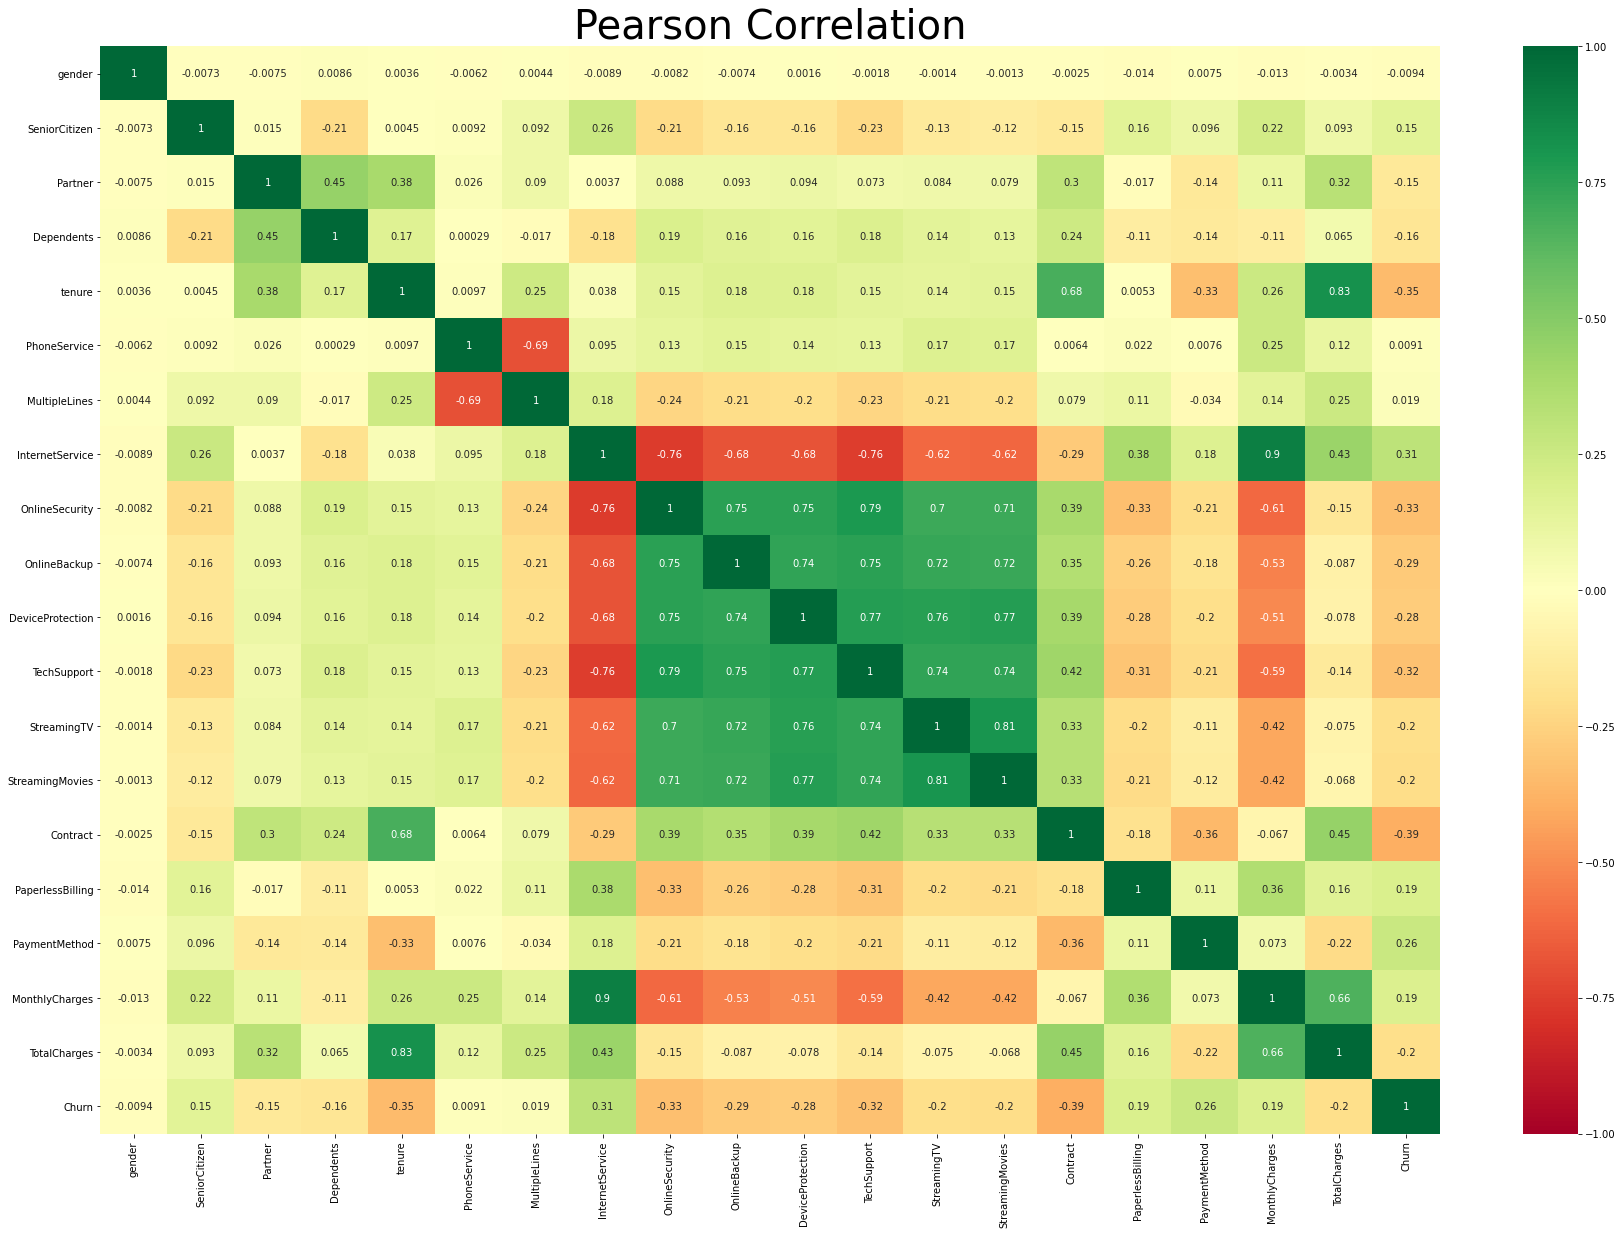

In [38]:
# Pearson (linear) correlation
corr_pearson = df.corr(method='pearson')

fig = plt.figure(figsize=(30,20))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation',fontsize = 40)
plt.show()

In [39]:
corr_pearson[abs(corr_pearson['Churn']) > 0.1].index

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
# df = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
#        'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
#        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

##  Building Machine Learning Models

In [41]:
X = df.drop('Churn',axis = 1)

In [42]:
y = df['Churn']

## train_test_split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 3)

## LOGISTIC REGRESSION ALGORITHM

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

79.6 %


## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

99.83 %


## Random Forest Algorithm


In [47]:
# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=3)  
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.83 %


## k-nearest neighbor algorithm

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print(round(acc_knn,2,), "%")

76.92 %


## Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,  y_train)

y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

70.46 %


## Perceptron

In [50]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
print(round(acc_perceptron,2,), "%")

77.34 %


## Linear SVC

In [51]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(random_state=5)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

78.95 %


## stochastic gradient descent (SGD) learning

In [52]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
sgd = linear_model.SGDClassifier(max_iter=5, tol=None,random_state=0)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

75.88 %


In [53]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.83,Random Forest
99.83,Decision Tree
79.60,Logistic Regression
78.95,Support Vector Machines
77.34,Perceptron
76.92,KNN
75.88,Stochastic Gradient Decent
70.46,Naive Bayes


### `As we can see, the Random Forest, Decision Tree goes on the first place with Accuracy 99.79%`